In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [5]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    41312.000000
mean      8167.830170
std       3302.760811
min         48.000000
25%       7998.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

**Station visibility to interval**

In [6]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<= 1000 m', '> 1000 m']
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

print(station.sample(20))
print("\nVisibility frequencies.")
station["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

                     visibility_o      vis_l
time                                        
2020-10-06 01:30:00          97.0  <= 1000 m
2020-12-10 21:30:00         692.0  <= 1000 m
2019-07-16 23:00:00        9994.0   > 1000 m
2019-03-15 10:00:00        9994.0   > 1000 m
2019-12-09 01:30:00        9994.0   > 1000 m
2019-09-24 13:30:00        9994.0   > 1000 m
2018-11-04 03:30:00        7998.0   > 1000 m
2018-12-17 06:30:00        7998.0   > 1000 m
2019-08-15 11:00:00        8996.0   > 1000 m
2020-12-10 16:00:00          97.0  <= 1000 m
2019-02-08 22:00:00        1207.0   > 1000 m
2019-11-29 08:00:00         257.0  <= 1000 m
2020-04-13 08:00:00        9994.0   > 1000 m
2019-02-16 05:30:00        9994.0   > 1000 m
2020-04-07 14:30:00        9994.0   > 1000 m
2019-05-30 23:30:00        9994.0   > 1000 m
2020-07-17 15:30:00        9994.0   > 1000 m
2019-05-29 02:30:00        9994.0   > 1000 m
2020-11-25 19:00:00        9994.0   > 1000 m
2019-05-05 16:30:00        9994.0   > 1000 m

Visibilit

> 1000 m     90%
<= 1000 m    10%
nan           0%
Name: vis_l, dtype: object

**Forecast D1**

In [7]:
#forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).set_index("time")
model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,1,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,2,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,3,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,4,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,17491,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,17492,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,17493,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


**Label meteorological model visibility. Concatenate Station and meteorological model. Few discrepancies between Station (half hours) and Station (only 0 o'clock hours). Less visibilty in half hours**  

In [8]:
#label meteorological model visbility points 0 and 1
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o","Unnamed: 0"])

#meteorological model frequencies
print("Meteorological model point 0")
print(df_all1k["visibility0_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))
print("\nMeteorological model point 1")
print(df_all1k["visibility1_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Station frequencies
print("\nActual visibility frequencies o'clock hours")
df_all1k["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Meteorological model point 0
> 1000 m     94%
<= 1000 m     6%
Name: visibility0_l, dtype: object

Meteorological model point 1
> 1000 m     92%
<= 1000 m     8%
Name: visibility1_l, dtype: object

Actual visibility frequencies o'clock hours


> 1000 m     91%
<= 1000 m     9%
Name: vis_l, dtype: object

**Scatter plot significant meteorological variables and vis_l**

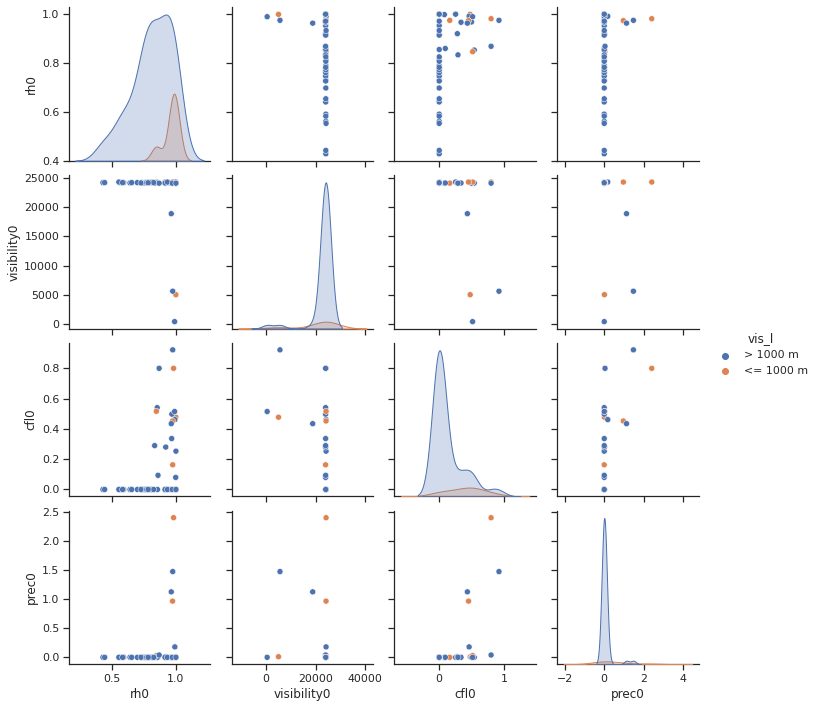

In [9]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["vis_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="vis_l");

**Scatter plot 3 PCA variables and vis_l**

In [10]:
df_all1k.iloc[:,1:-2].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

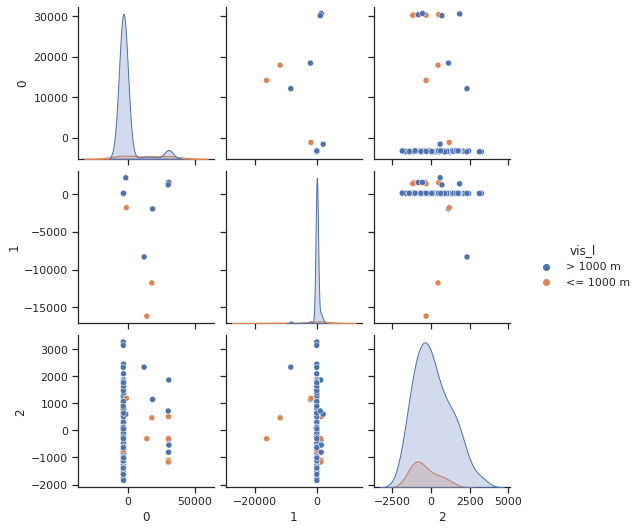

In [11]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:-2]),
                                                        index =df_all1k.index)
df_pca["vis_l"] = df_all1k.vis_l
sns.pairplot(df_pca.sample(100), hue="vis_l");

**Meteorological model score Heidke Skill Score (HSS).Forecast Day 0 point 0(0.24) and point 1 (0.28)**

In [12]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility0_l ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility0_l,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility1_l ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility1_l,output_dict=True)).T)

HSS point 0
visibility0_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            416      1051   1467
> 1000 m             687     14991  15678
All                 1103     16042  17145
Heidke Skill Score: 0.27

Quality report Meteorological model point 0
              precision    recall  f1-score       support
<= 1000 m      0.377153  0.283572  0.323735   1467.000000
> 1000 m       0.934484  0.956181  0.945208  15678.000000
accuracy       0.898629  0.898629  0.898629      0.898629
macro avg      0.655819  0.619876  0.634472  17145.000000
weighted avg   0.886797  0.898629  0.892032  17145.000000

HSS point 1
visibility1_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            468       999   1467
> 1000 m             872     14806  15678
All                 1340     15805  17145
Heidke Skill Score: 0.27

Quality report Meteorological model point 1
              precision    recall  f1-score       support
<= 1000 m

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [13]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 4.307163616810307e-282
Significance level: 0.01
Degres of of freedom:  1
Statistic 1288.123359233199
Reject H0,There is an association between machine learning forecast and observed values


**Quality report meorologic model point 0 and confusion matrix**

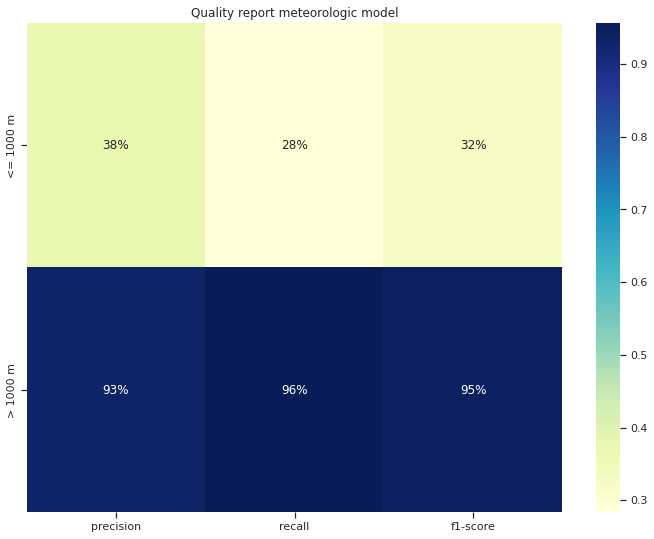

In [14]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all1k.vis_l, df_all1k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


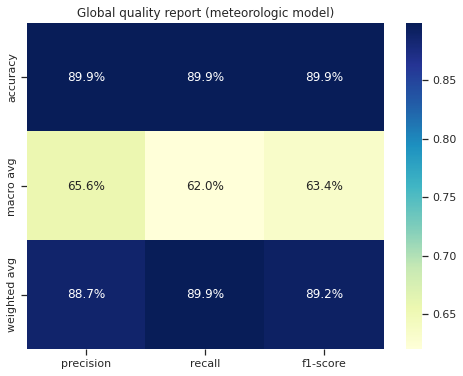

In [15]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

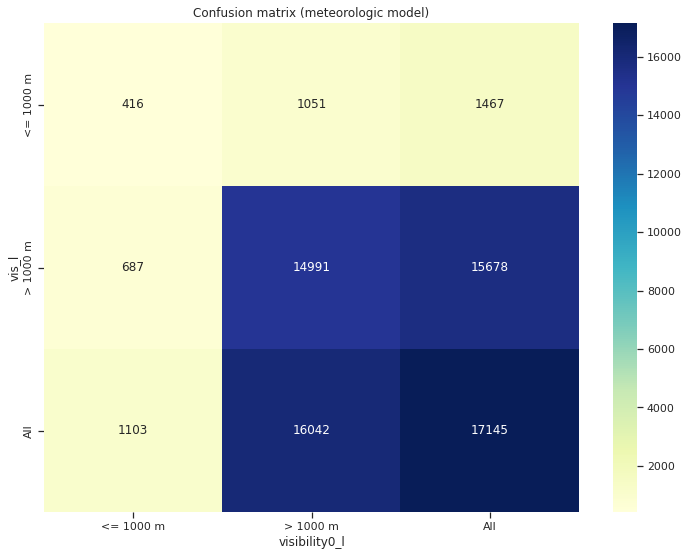

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

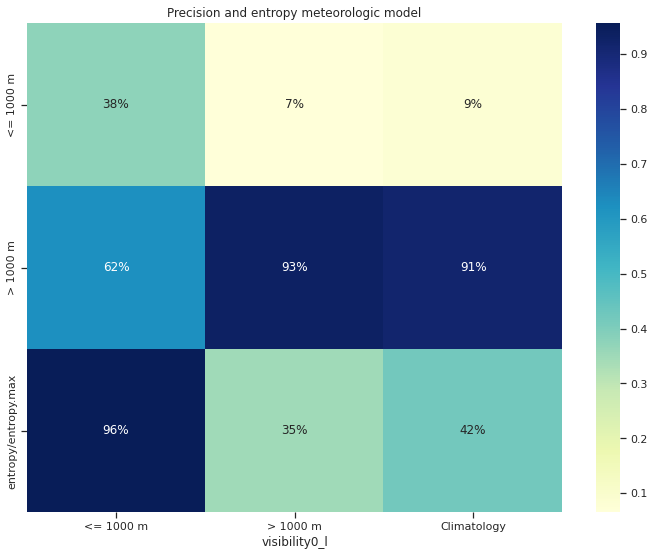

In [17]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [18]:
df_all1k = df_all1k.drop(columns=["visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,> 1000 m,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.0,0.000000e+00,0.142531,0.0,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 02:00:00,> 1000 m,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.0,-8.593750e-07,0.061034,0.0,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,> 1000 m,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.0,0.000000e+00,0.065096,0.0,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,> 1000 m,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.0,-2.343750e-09,0.085678,0.0,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
2019-01-02 05:00:00,<= 1000 m,172.277390,0.0,1675.816650,0.444178,0.813525,103278.773438,279.637054,0.811063,24135.000000,...,0.0,6.640625e-06,0.108834,0.0,0.0,0.108834,5723.016113,1601.333618,253.504395,281.562134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 19:00:00,> 1000 m,15.196351,0.0,1130.906982,4.987753,11.324133,102787.117188,280.919373,0.870596,24152.253906,...,0.0,6.250000e-05,0.000000,0.0,0.0,0.000000,5537.417480,1531.997803,247.842743,273.755432
2020-12-24 20:00:00,> 1000 m,16.350925,0.0,1122.497314,5.154222,11.432768,102946.109375,280.681763,0.848550,24126.740234,...,0.0,-1.875000e-03,0.000000,0.0,0.0,0.000000,5535.646484,1534.440552,248.129868,273.678802
2020-12-24 21:00:00,> 1000 m,14.447461,0.0,1130.548462,5.296582,11.482006,102860.429688,280.298004,0.850470,24164.386719,...,0.0,1.171875e-03,0.000000,0.0,0.0,0.000000,5539.025391,1538.744385,248.260315,273.823364


**Machine learning**

In [19]:
#x variables
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [01:19<00:00,  2.75s/it]


In [21]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
Perceptron,0.81,0.74,None,0.84,0.31
BernoulliNB,0.76,0.73,None,0.80,0.21
NearestCentroid,0.76,0.73,None,0.81,0.26
LabelSpreading,0.91,0.73,None,0.91,15.70
LabelPropagation,0.91,0.73,None,0.91,8.75
BaggingClassifier,0.92,0.68,None,0.91,5.73
KNeighborsClassifier,0.92,0.66,None,0.91,1.68
ExtraTreeClassifier,0.88,0.66,None,0.89,0.21
GaussianNB,0.41,0.66,None,0.50,0.13


**ML LGBMClassifier**


Confusion matrix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        153       129   282
> 1000 m         170      2977  3147
All              323      3106  3429
Heidke Skill Score: 0.46

Quality report (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.47    0.54      0.51   282.00
> 1000 m           0.96    0.95      0.95  3147.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.72    0.74      0.73  3429.00
weighted avg       0.92    0.91      0.92  3429.00

Confusion matrix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        169       137   306
> 1000 m         151      2972  3123
All              320      3109  3429
Heidke Skill Score: 0.49

Quality report (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.53    0.55      0.54   306.00
> 1000 m           0.9

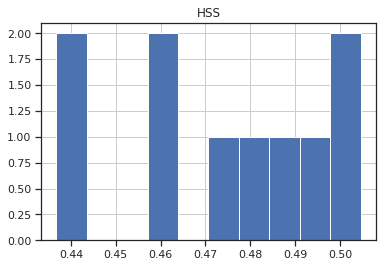

In [22]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning statistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();

**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.27) and at point 1 (0.27). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [25]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.27, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")


alpha:  0.01

HSS list from machine learning test: [0.46 0.49 0.46 0.48 0.44 0.5  0.49 0.48 0.5  0.44]

p_value point 0: 4.0131792066577126e-10

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [26]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

# variables X
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        154       128   282
> 1000 m         140      3007  3147
All              294      3135  3429
Heidke Skill Score: 0.49

Quality report (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.52    0.55      0.53   282.00
> 1000 m           0.96    0.96      0.96  3147.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.74    0.75      0.75  3429.00
weighted avg       0.92    0.92      0.92  3429.00

Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        182       124   306
> 1000 m         134      2989  3123
All              316      3113  3429
Heidke Skill Score: 0.54

Quality report (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.58    0.59      0.59   306.00
> 1000 m           0.96 

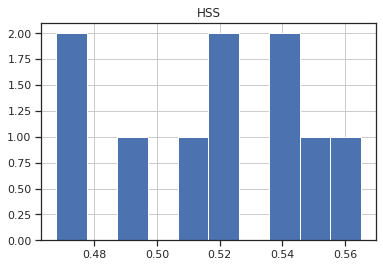

In [27]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [28]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.458 0.494 0.461 0.477 0.437 0.5   0.486 0.48  0.505 0.437]

HSS with time variables: [0.492 0.544 0.521 0.517 0.476 0.565 0.515 0.54  0.554 0.468]

alpha:  0.01

p_value point:  6.598054668318564e-07

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


In [29]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("vis_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        172       110   282
> 1000 m         126      3021  3147
All              298      3131  3429
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.58    0.61      0.59   282.00
> 1000 m           0.96    0.96      0.96  3147.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.77    0.78      0.78  3429.00
weighted avg       0.93    0.93      0.93  3429.00

Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        192       108   300
> 1000 m         118      3011  3129
All              310      3119  3429
Heidke Skill Score: 0.59

Quality report (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.62    0.64      0.63   300.00
> 1000 m           0.97 

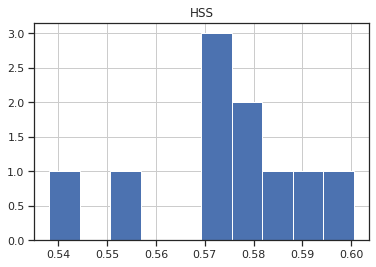

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [31]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.492 0.544 0.521 0.517 0.476 0.565 0.515 0.54  0.554 0.468]

HSS with ExtraTreesClassifier: [0.556 0.593 0.571 0.601 0.573 0.584 0.576 0.577 0.574 0.538]

alpha:  0.01

p_value point:  3.784480005463161e-05

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
